<a href="https://colab.research.google.com/github/caolivap/NeuralNetworkClassification/blob/master/Practica_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica para predecir imágenes de ropa



In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Usamos el dataset de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorías. Las imágenes muestran artículos individuales de ropa a una resolución baja (28 por 28 pixeles) como se ve acá:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Se usarán 60,000 imagenes para entrenar la red neuronal y 10,000 imagenes para evaluar qué tan exacto aprende la red a clasificar imágenes. Accedemos al MNIST directamente desde TensorFlow. Lo importamos y cargamos el set de datos así:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varían de 0 a 255. Los *labels* son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la clase de ropa que la imagen representa.


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una única etiqueta. Ya que los *Class names* no están incluidos en el dataset, los almacenamos para usarlos luego cuando se visualicen las imágenes:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print (class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Pre-procesamos el set de datos

El set de datos debe ser pre-procesado antes de entrenar a la red. Podemos inspeccionar la primera imagen en el set de entrenamiento, encontraremos que los valores de los pixeles estan entre 0 y 255:

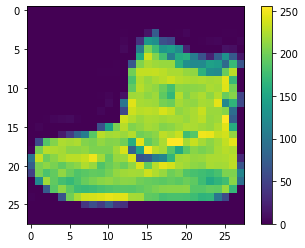

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construcción básicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones del set de datos que les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compilamos el modelo

Antes de que el modelo esté listo para entrenar , se necesitan algunas configuraciones más. Éstas son agregadas durante el paso de compilación del modelo:

* *Loss function* — Mide qué tan exacto es el modelo durante el entrenamiento. Se requiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Representa cómo el modelo se actualiza basado en el set de datos que ve y la funcion de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de las imágenes que son correctamente clasificadas.

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregar los datos de entrenamiento al modelo. En esta práctica, el set de datos de entrenamiento están en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imágenes y etiquetas.
3. Le preguntamos al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo, incluido en el arreglo `test_images`. Luego verificamos que las predicciones sean iguales a las etiquetas del arreglo `test_labels`.

Para comenzar a entrenar, Hacemos uso del método `model.fit`, es llamado así porque *fit* (ajusta) el modelo al set de datos de entrenamiento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5022 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3772 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2805 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2558 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2438 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

A medida que el modelo entrena, la pérdida y la exactitud son desplegadas. ¿Qué exactitud alncazó el modelo sobre el set de datos de entrenamiento?